In [1]:
import re
from nltk.stem import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
terms = {}

In [3]:
def translate(to_translate):
    tabin = u'áéíóú'
    tabout = u'aeiou'
    tabin = [ord(char) for char in tabin]
    translate_table = dict(zip(tabin, tabout))
    return to_translate.translate(translate_table)

def remove_non_alphanumeric(result):
    return re.sub(r'[^a-zA-Z0-9]', '', result)

def normalize(token):
    result = token.lower()
    result = translate(result)
    result = remove_non_alphanumeric(result)
    return result


In [4]:
file_path = "pg2000.txt"
with open(file_path, "r") as f:
    for line in f.readlines():
        for word in line.strip().split():
            possible_term = normalize(word)
            try:
                terms[possible_term] += 1
            except:
                terms[possible_term] = 1

In [5]:
print(len(terms))

23189


Lista ordenada por frecuencia descendente

In [6]:
sorted_terms = sorted(terms.items(), key=lambda item: item[1], reverse=True)

In [7]:
rank = []
values = []

counter = 1
for sorted_term in sorted_terms:
    rank.append(counter)
    counter += 1
    values.append(sorted_term[1])
    
x = rank
y = values

xlog = np.log(rank)
ylog = np.log(values)

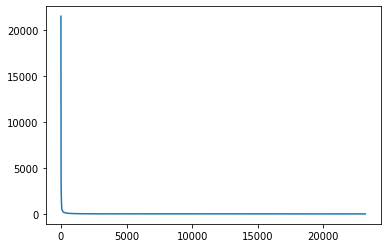

In [8]:
plt.plot(x, y)

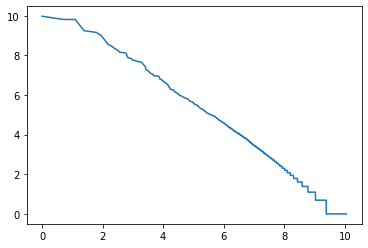

In [9]:
plt.plot(xlog, ylog)

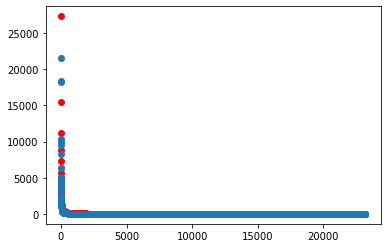

In [10]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*(x**b)

popt, pcov = curve_fit(func, x, y)
y_pred = func(x, *popt)

plt.scatter(x, y_pred, color="red")
plt.scatter(x,y)
plt.show()

Pendiente: -1.2089984894175159
Ordenada al Origen: 11.835907802047116
 
-1.209 x + 11.84


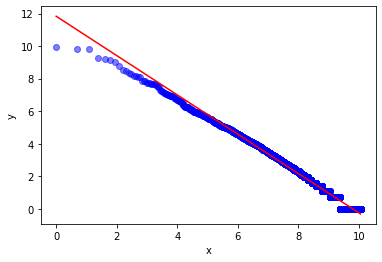

In [11]:
rectaAjuste = np.polyfit(xlog, ylog, 1)

pendiente = rectaAjuste[0]

ordenadaAlOrigen = rectaAjuste[1]

rectaAjusteEcuacion = np.poly1d(rectaAjuste)
y_pred_log = rectaAjusteEcuacion(xlog)

print("Pendiente: {}".format(pendiente))
print("Ordenada al Origen: {}".format(ordenadaAlOrigen))
print(rectaAjusteEcuacion)
plt.plot(xlog, ylog, "bo", alpha = 0.5)
plt.plot(xlog, y_pred_log, "r", label=r'$f_{{x}} = %.4f x + {%.4f}$' % (pendiente, ordenadaAlOrigen))
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Pendiente: -0.0038031788609776043
Ordenada al Origen: 60.66411875762631
 
-0.003803 x + 60.66


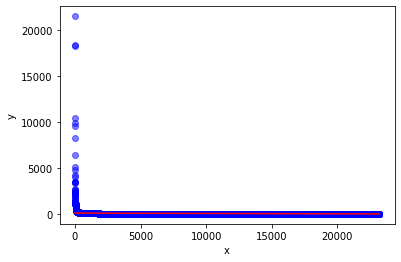

In [12]:
rectaAjuste = np.polyfit(x, y, 1)

pendiente = rectaAjuste[0]

ordenadaAlOrigen = rectaAjuste[1]

rectaAjusteEcuacion = np.poly1d(rectaAjuste)
y_pred_log = rectaAjusteEcuacion(x)

print("Pendiente: {}".format(pendiente))
print("Ordenada al Origen: {}".format(ordenadaAlOrigen))
print(rectaAjusteEcuacion)
plt.plot(x, y, "bo", alpha = 0.5)
plt.plot(x, y_pred_log, "r", label=r'$f_{{x}} = %.4f x + {%.4f}$' % (pendiente, ordenadaAlOrigen))
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [13]:
pow(np.corrcoef(y, y_pred)[0][1], 2)

0.9236733223632114

In [14]:
pow(np.corrcoef(ylog, y_pred_log)[0][1], 2)

0.7116834823014575